### Optimizer-1: SGD

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential

from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD, Adagrad, Adadelta, Adam

In [2]:
df = pd.read_csv(r"E:\#Data Science Innomatics\Module 7 Deep Learning\DL Datasets\2.concerticcir1.csv", header=None)
df.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [3]:
df[2] = df[2].astype('int')

In [4]:
df.head()

,0,1,2
0,-0.382891,-0.090840,1
1,-0.020962,-0.477874,1
2,-0.396116,-1.289427,0
3,-0.618130,-0.063837,1
4,0.703478,-0.187038,1


<Axes: xlabel='0', ylabel='1'>

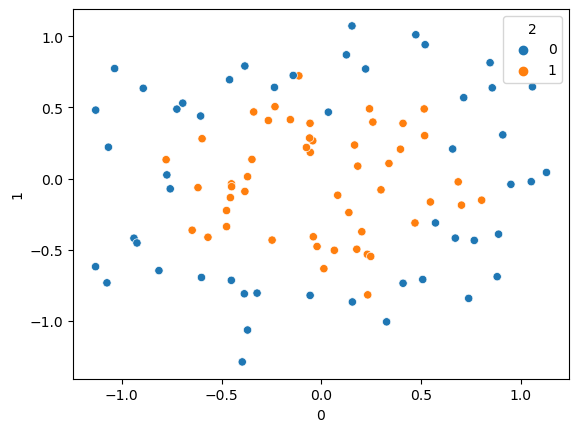

In [5]:
sns.scatterplot(data = df, x=0, y =1, hue=2)

In [6]:
model = Sequential()

model.add(InputLayer(input_shape=(2,)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.optimizers import SGD

In [12]:
sgd = SGD(learning_rate=0.01)

#In SGD, we manually have to give learning rate is called learning rate schedule
#Learning rate change in run/training time.

#If in training batch = 1 so optimizer will be SGD
#If in training batchsize >1 and less than total data point, optimizer will be MiniBatchSGD

In [17]:
model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
df.iloc[:,:-1]

,0,1
0,-0.382891,-0.090840
1,-0.020962,-0.477874
2,-0.396116,-1.289427
3,-0.618130,-0.063837
4,0.703478,-0.187038
...,...,...
95,-0.474862,-0.224981
96,0.126272,0.869784
97,-0.647365,-0.363424
98,0.474405,1.011016


In [30]:
df.iloc[:,-1]

0     1
1     1
2     0
3     1
4     1
     ..
95    1
96    0
97    1
98    0
99    0
Name: 2, Length: 100, dtype: int32

In [31]:
model.fit(df.iloc[:,:-1], df.iloc[:,-1], batch_size=10, epochs=3)

Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5299 - loss: 0.6950 
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5217 - loss: 0.6971 
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4753 - loss: 0.7138 


**Scheduling Learning Rate**

In [33]:
from keras.callbacks import LearningRateScheduler

In [13]:
def schedule(epoch, lr):
    if epoch <= 5:
        return lr
    else:
        return lr*np.exp(-0.1)  
    
#When epoch is less than equal to 5 lr will be same
#When epoch is more than 5 so learning rate will reduce
#using function we have to do lrscheduling

In [14]:
lr = LearningRateScheduler(schedule, verbose=1)

In [15]:
model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(df.iloc[:,:-1], df.iloc[:,-1], batch_size=10, epochs=10, callbacks=[lr])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4943 - loss: 0.8206 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5396 - loss: 0.7667 - learning_rate: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4862 - loss: 0.8080 - learning_rate: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4379 - loss: 0.8374 - learning_rate: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5055 - loss: 0.7706 - learning_rate: 0.0100

Epoch 6: LearningRateScheduler setting learning rate to 0.009999

* **After 5th epochs learning rate is decreasing**
* **SGD will not reduce learning rate automatically, we have to do manually using learningrate scheduling**m

In [23]:
from keras.callbacks import LearningRateScheduler

In [25]:
lr = LearningRateScheduler(schedule, verbose=1)

In [26]:
model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(df.iloc[:,:-1], df.iloc[:,-1], batch_size=10, epochs=20, callbacks=[lr])


Epoch 1: LearningRateScheduler setting learning rate to 0.006703200750052929.
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5482 - loss: 0.7171 - learning_rate: 0.0067

Epoch 2: LearningRateScheduler setting learning rate to 0.006703200750052929.
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4933 - loss: 0.7466 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.006703200750052929.
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4489 - loss: 0.7684 - learning_rate: 0.0067

Epoch 4: LearningRateScheduler setting learning rate to 0.006703200750052929.
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5105 - loss: 0.7284 - learning_rate: 0.0067

Epoch 5: LearningRateScheduler setting learning rate to 0.006703200750052929.
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5763 - loss: 0.6900 - learning_rate: 0.0067

Epoch 6: LearningRateScheduler setting learning rate to 0.006703

In [29]:
def schedule(epoch, lr):
    if epoch <= 10:
        return lr
    else:
        return lr*np.exp(-0.1)
    
lr = LearningRateScheduler(schedule, verbose=1)

model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])

model.fit(df.iloc[:,:-1], df.iloc[:,-1], batch_size=10, epochs=20, callbacks=[lr])


Epoch 1: LearningRateScheduler setting learning rate to 0.0006720550591126084.
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5050 - loss: 0.7100 - learning_rate: 6.7206e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0006720550591126084.
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4697 - loss: 0.7195 - learning_rate: 6.7206e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0006720550591126084.
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5286 - loss: 0.6999 - learning_rate: 6.7206e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0006720550591126084.
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4953 - loss: 0.7107 - learning_rate: 6.7206e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0006720550591126084.
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4229 - loss: 0.7379 - learning_rate: 6.7206e-04

Epoch 6: LearningRateScheduler setting 

### Optimizer-2: SGD + Momentum / MBSGD + Momentum

In [30]:
model = Sequential()

model.add(InputLayer(input_shape=(2,)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


sgd = SGD(learning_rate=0.01, momentum=0.8)
#momentum is nothing but gamma value , usally we can use 0.7-0.9 but we need to do hyperparameter tuning

def schedule(epoch, lr):
    if epoch <= 10:
        return lr
    else:
        return lr*np.exp(-0.1)
    
lr = LearningRateScheduler(schedule, verbose=1)

model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])

model.fit(df.iloc[:,:-1], df.iloc[:,-1], batch_size=10, epochs=20, callbacks=[lr])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/20


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5186 - loss: 0.7660 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 0.7585 - learning_rate: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5167 - loss: 0.7190 - learning_rate: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - loss: 0.7303 - learning_rate: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4545 - loss: 0.7141 - learning_rate: 0.0100

Epoch 6: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4817 - loss:

### Optimizer-3: Nestrov Accelerated Gradient (NAG)

In [31]:
model = Sequential()

model.add(InputLayer(input_shape=(2,)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


sgd = SGD(learning_rate=0.01, momentum=0.8, nesterov=True)
#momentum is nothing but gamma value , usally we can use 0.7-0.9 but we need to do hyperparameter tuning
#Netsrov=true means it is using NAG optimizer

def schedule(epoch, lr):
    if epoch <= 10:
        return lr
    else:
        return lr*np.exp(-0.1)
    
lr = LearningRateScheduler(schedule, verbose=1)

model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])

model.fit(df.iloc[:,:-1], df.iloc[:,-1], batch_size=10, epochs=20, callbacks=[lr])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/20


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4315 - loss: 0.7198 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4684 - loss: 0.7060 - learning_rate: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4720 - loss: 0.6998 - learning_rate: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5073 - loss: 0.6943 - learning_rate: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4782 - loss: 0.7031 - learning_rate: 0.0100

Epoch 6: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5672 - loss:

* **SGD, MBSGD, SGD+Momentum, NAG optimizers dont change learning rate bydefault, if it not change there is an issue of high oscillation, but in this optimizer we can change learningrate by manuaalyy by using Learning rate scheuling.**

* **In ada-grad, ada-delta, adam they automatically change learning rate**

### Optimizer-4: Adaptive-Grad(Ada-Grad)

In [34]:
from keras.optimizers import Adagrad

In [35]:
ada_grad = Adagrad(learning_rate=0.001, epsilon=1e-07)

In [36]:
model = Sequential()

model.add(InputLayer(input_shape=(2,)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


ada_grad = Adagrad(learning_rate=0.001, epsilon=1e-07)
#Ada grad automatically change lr, we no need to use lrscheduling
#Epsilon value for dominator not becoming zero


model.compile(optimizer=ada_grad, loss='binary_crossentropy',metrics=['accuracy'])

model.fit(df.iloc[:,:-1], df.iloc[:,-1], batch_size=10, epochs=20)

Epoch 1/20


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4797 - loss: 0.7797  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5241 - loss: 0.7520 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5135 - loss: 0.7560 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6334 - loss: 0.6659 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4582 - loss: 0.7919 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4913 - loss: 0.7628 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4458 - loss: 0.7978 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4969 - loss: 0.7609 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4429 - loss: 0.8002 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5691 - loss: 0.7128 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4513 - loss: 0.7970 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4848 - l

### Optimizer-5: Ada-Delta and RMS Prop

In [37]:
model = Sequential()

model.add(InputLayer(input_shape=(2,)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


ada_del = Adadelta(learning_rate=0.001, epsilon=1e-07, use_ema=True, ema_momentum=0.99)
#Use ema means Exponentially Moving Average
#ema_momentum means gamma value

model.compile(optimizer=ada_del, loss='binary_crossentropy',metrics=['accuracy'])

model.fit(df.iloc[:,:-1], df.iloc[:,-1], batch_size=10, epochs=20)

Epoch 1/20


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5954 - loss: 0.6948
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5288 - loss: 0.6941 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5105 - loss: 0.7007 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5165 - loss: 0.6906 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5423 - loss: 0.6996 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5884 - loss: 0.6871 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 0.7072 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5331 - loss: 0.6965 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5447 - loss: 0.6833 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6055 - loss: 0.6936 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4901 - loss: 0.7052 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5194 - los

### Optimizer-6: ADAM

In [ ]:
adam = Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)
#we have to use bydefault values for this values

In [38]:
model = Sequential()

model.add(InputLayer(input_shape=(2,)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


adam = Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)
#we have to use bydefault values for this values


model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

model.fit(df.iloc[:,:-1], df.iloc[:,-1], batch_size=10, epochs=20)

Epoch 1/20


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4422 - loss: 0.7914  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5900 - loss: 0.6927 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5576 - loss: 0.7131 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4526 - loss: 0.7698 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5568 - loss: 0.7048 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4670 - loss: 0.7481 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5210 - loss: 0.7210 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4453 - loss: 0.7573 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4822 - loss: 0.7359 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4502 - loss: 0.7381 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5509 - loss: 0.6897 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - l